<a href="https://colab.research.google.com/github/NBK-code/PyTorch_Basics/blob/main/PyTorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, 
                                            n_features = 1, 
                                            noise = 20, 
                                            random_state = 1)

In [3]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [5]:
print(X.shape)

torch.Size([100, 1])


In [6]:
print(y.shape)

torch.Size([100])


In [8]:
y = y.view(y.shape[0], 1)

In [9]:
print(y.shape)

torch.Size([100, 1])


In [10]:
n_samples, n_features = X.shape

In [11]:
input_size = n_features
output_size = 1

In [12]:
model = nn.Linear(input_size, output_size)

In [13]:
criterion = nn.MSELoss()

In [15]:
learning_rate = 0.01

In [16]:
optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate)

In [20]:
num_epochs = 100

for epoch in range(num_epochs):

  y_predicted = model(X)

  loss = criterion(y_predicted, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch%10 == 0:
    print("epochs: ", epoch+1, "loss: ", loss.item())

epochs:  1 loss:  333.0009460449219
epochs:  11 loss:  332.88494873046875
epochs:  21 loss:  332.79998779296875
epochs:  31 loss:  332.7378234863281
epochs:  41 loss:  332.6922607421875
epochs:  51 loss:  332.6589050292969
epochs:  61 loss:  332.63446044921875
epochs:  71 loss:  332.6165771484375
epochs:  81 loss:  332.6034851074219
epochs:  91 loss:  332.5938720703125


In [21]:
predicted = model(X).detach().numpy()

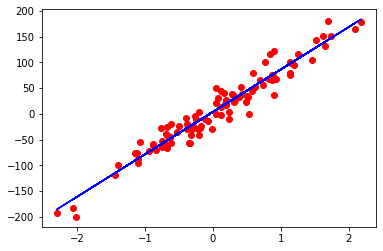

In [22]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()